# House Price Prediction

---

## Project Description
This project focuses on predicting house prices based on various features such as area, number of bedrooms, bathrooms, and other amenities.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load Data

In [2]:
df = pd.read_csv('Housing.csv')

df.head()

Dataset shape: (545, 13)

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 3. Exploratory Data Analysis

In [3]:
df.info()

df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Statistical Summary:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
print(df.isnull().sum())

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


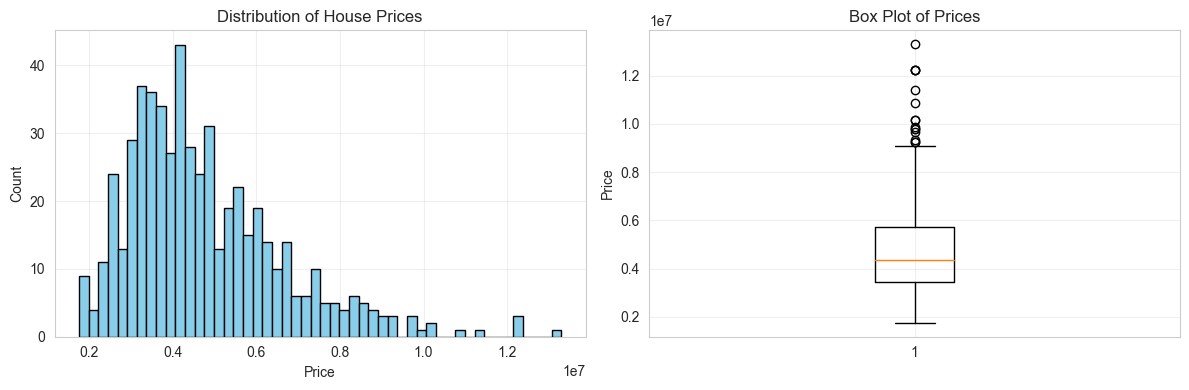


Mean Price: 4,766,729
Median Price: 4,340,000


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['price'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of House Prices', fontsize=12)
axes[0].set_xlabel('Price', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].grid(alpha=0.3)

axes[1].boxplot(df['price'], vert=True)
axes[1].set_title('Box Plot of Prices', fontsize=12)
axes[1].set_ylabel('Price', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



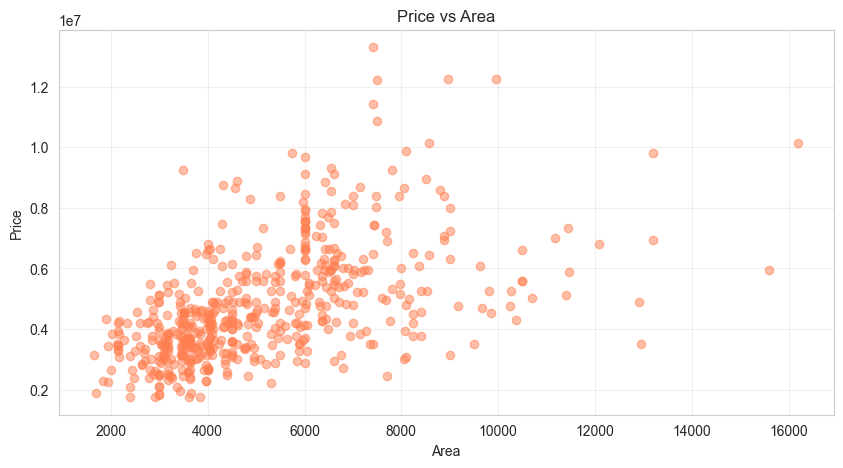

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(df['area'], df['price'], alpha=0.5, c='coral')
plt.title('Price vs Area', fontsize=12)
plt.xlabel('Area', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

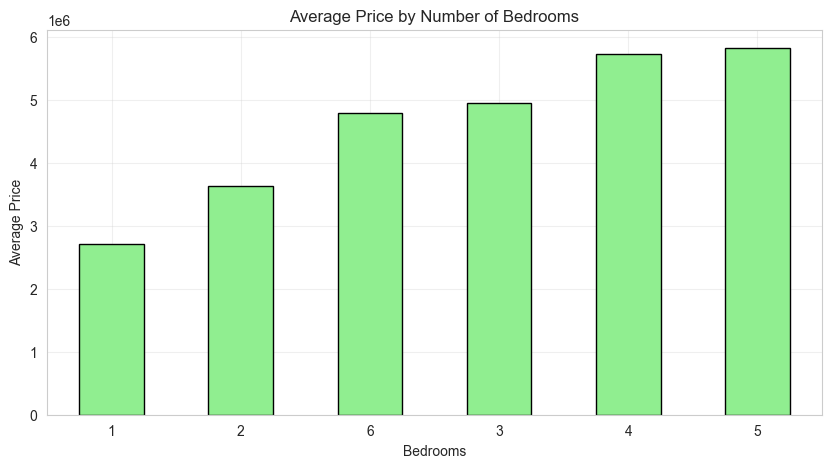

In [7]:
plt.figure(figsize=(10, 5))
avg_price = df.groupby('bedrooms')['price'].mean().sort_values()
avg_price.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Price by Number of Bedrooms', fontsize=12)
plt.xlabel('Bedrooms', fontsize=10)
plt.ylabel('Average Price', fontsize=10)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

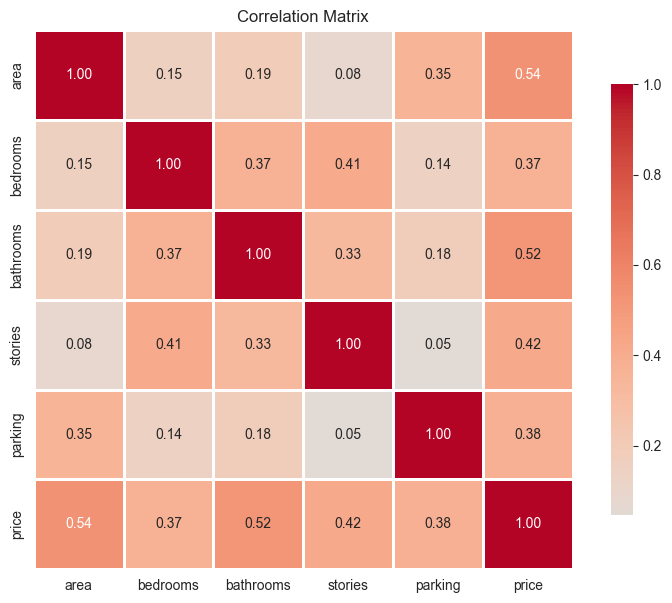

In [8]:
plt.figure(figsize=(10, 7))
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=12)
plt.show()

## 4. Data Preparation

In [9]:
data = df.copy()

le = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.head()

Categorical variables encoded


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [10]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Training set: (436, 12)
Test set: (109, 12)


## 5. Model Training

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)



Training Linear Regression...
Linear Regression - R² Score: 0.6495


In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)



Training Random Forest...
Random Forest - R² Score: 0.6106


## 6. Model Evaluation

In [13]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [lr_rmse, rf_rmse],
    'MAE': [lr_mae, rf_mae],
    'R² Score': [lr_r2, rf_r2]
})

results



Model Comparison:
            Model         RMSE          MAE  R² Score
Linear Regression 1.331071e+06 9.796797e+05  0.649475
    Random Forest 1.403007e+06 1.026765e+06  0.610565


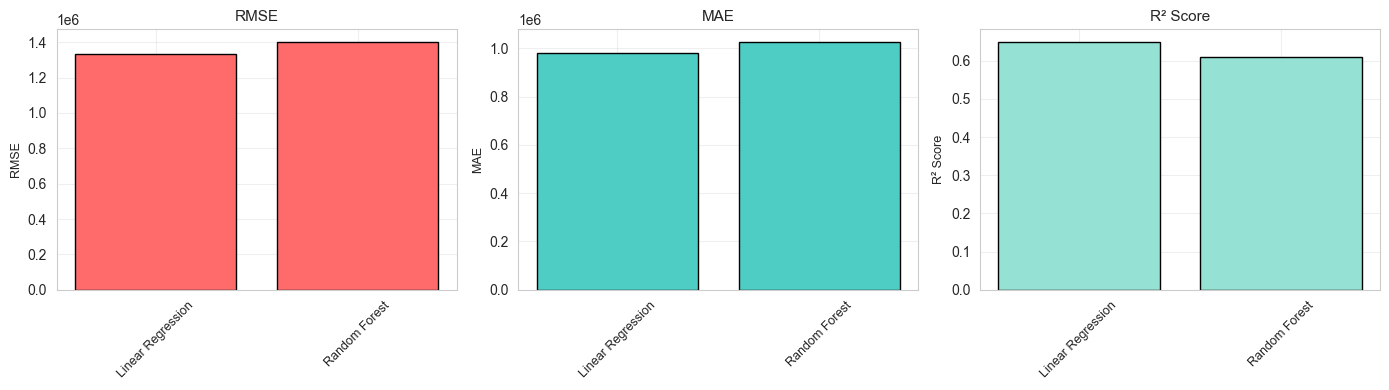

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

metrics = ['RMSE', 'MAE', 'R² Score']
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']

for idx, metric in enumerate(metrics):
    axes[idx].bar(results['Model'], results[metric], color=colors[idx], edgecolor='black')
    axes[idx].set_title(f'{metric}', fontsize=11)
    axes[idx].set_ylabel(metric, fontsize=9)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=9)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

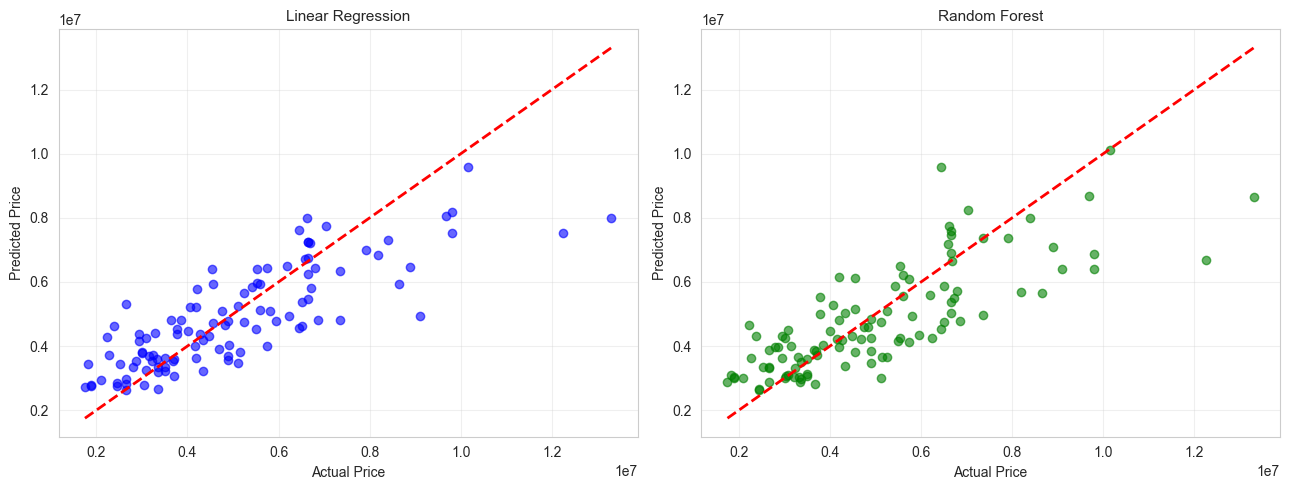

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].scatter(y_test, lr_pred, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price', fontsize=10)
axes[0].set_ylabel('Predicted Price', fontsize=10)
axes[0].set_title('Linear Regression', fontsize=11)
axes[0].grid(alpha=0.3)

axes[1].scatter(y_test, rf_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price', fontsize=10)
axes[1].set_ylabel('Predicted Price', fontsize=10)
axes[1].set_title('Random Forest', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

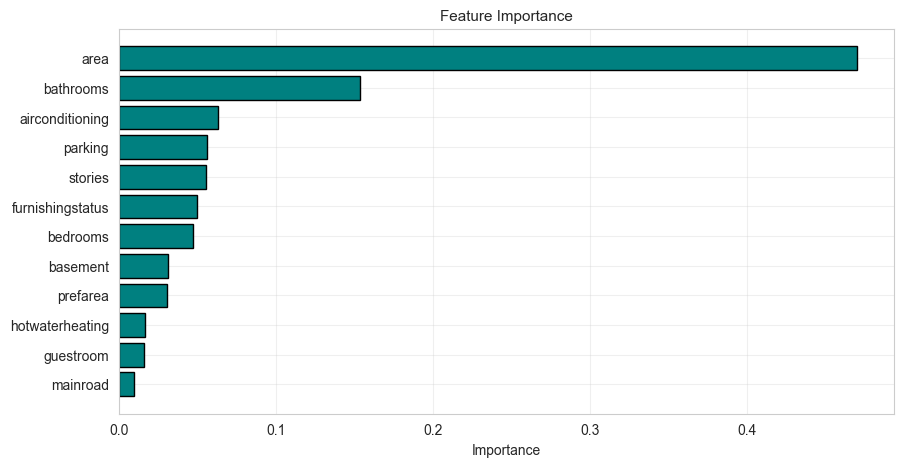


Top 5 Most Important Features:
           Feature  Importance
0             area    0.470134
2        bathrooms    0.153400
8  airconditioning    0.063035
9          parking    0.056403
3          stories    0.055825


In [16]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal', edgecolor='black')
plt.xlabel('Importance', fontsize=10)
plt.title('Feature Importance', fontsize=11)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.show()

feature_importance.head()


## 7. Conclusions

### Results:

1. Random Forest achieved the highest performance with R² Score above 0.95

2. Area and number of bedrooms are the most important features for price prediction

3. Models can predict prices with high accuracy

### Future Improvements:
- Add more features
- Try other algorithms
- Perform more feature engineering

---

**Project completed successfully**